# Introduction

The goal of this report is to examine a variety of different libraries in the Python 3 programming language. Specifically, we intend to make use of the Pandas and NumPy libaries for data wrangling and manipulation; Seaborn and Bokeh libraries for data visualizations, and TensorFlow and Sklearn for our own machine learning element. 

Our analysis will be a result of a jokes dataset from a UC Berkeley machine learning web page. This data set contains 156 jokes that were rated by over 7,000 users. It is important to note that not all jokes were rated by all users. Still, we will look to create a model that will recommend jokes to users based off jokes they have rated positively in the past. We hope to make this process seamless and interpretable through the use of the various built-in Python 3 libraries. 

The results are below. We hope you enjoy!

In [114]:
## Import the required packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
import warnings
warnings.filterwarnings('ignore')

# Reading in and Manipulating the Data with Pandas and Numpy

In [158]:
df = pd.read_csv('Transformed Jester Data.csv', delimiter = ',')
print(df.head())

   Number_of_ratings     1     2     3     4     5     6     7     8     9  \
0                1.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0   
1                1.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0   
2                4.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0   
3               47.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0   
4               13.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0   

   ...   149   150    151    152   153   154   155   156    157    158  
0  ...  99.0  99.0  99.00  99.00  99.0  99.0  99.0  99.0  99.00  99.00  
1  ...  99.0  99.0  99.00  99.00  99.0  99.0  99.0  99.0  99.00  99.00  
2  ...  99.0  99.0  99.00  99.00  99.0  99.0  99.0  99.0  99.00  99.00  
3  ...  99.0  99.0   5.61  -4.51   0.0   0.0  99.0   0.0   5.93   4.19  
4  ...  99.0  99.0  99.00  99.00  99.0   0.0  99.0  99.0  99.00   0.00  

[5 rows x 159 columns]


In [154]:
# Method 2: use np.genfromtxt()
df = np.genfromtxt('Transformed Jester Data.csv', delimiter = ',')

In [155]:
## Get the counts of user
df.shape # 7700 -1 = 7699 users

(7701, 159)

In [159]:
## Sort the data by number of ratings 
df.sort_values(by = 'Number_of_ratings')

,Number_of_ratings,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.0,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
5151,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.0,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
5152,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.0,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
5155,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.0,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
918,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.0,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,136.0,99.0,99.0,99.0,99.0,99.0,99.0,6.10,0.00,99.0,...,0.00,0.00,-4.39,-3.22,0.00,0.00,0.00,0.00,-2.95,0.00
6165,136.0,99.0,99.0,99.0,99.0,99.0,99.0,-9.30,-9.36,99.0,...,-19.54,9.50,9.38,-9.15,-8.99,8.99,9.48,9.32,9.13,-9.79
2375,136.0,99.0,99.0,99.0,99.0,99.0,99.0,-2.80,1.87,99.0,...,0.24,-2.80,-3.33,1.10,0.98,0.24,-3.98,-4.47,-1.79,0.24
890,136.0,99.0,99.0,99.0,99.0,99.0,99.0,-2.23,-4.72,99.0,...,-3.35,-2.05,-4.66,-2.23,-6.56,-3.65,-4.07,-4.90,-4.01,-8.52


In [160]:
## How many of them have 1, 2, 3, 4, 5,...100... ratings
df['Number_of_ratings'].nunique() ## There are 130 unique ratings

## What are the distribution for # of ratings?
rc = df['Number_of_ratings'].value_counts()
rc = pd.DataFrame(rc)
pd.set_option('display.max_rows', rc.shape[0]+1)

rc

## Create a cumulative sum of the ratings
rc['cum_sum'] = rc['Number_of_ratings'].cumsum()
rc

,Number_of_ratings,cum_sum
1.0,1224,1224
2.0,1026,2250
3.0,738,2988
4.0,610,3598
5.0,459,4057
6.0,335,4392
7.0,312,4704
8.0,211,4915
9.0,192,5107
11.0,166,5273


In [161]:
## If we set five we'll clean half of the data
df.describe()

,Number_of_ratings,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
count,7699.000000,7699.0,7699.0,7699.0,7699.0,7699.0,7699.0,7699.000000,7699.000000,7699.0,...,7699.000000,7699.000000,7699.000000,7699.000000,7699.000000,7699.000000,7699.000000,7699.000000,7699.000000,7699.000000
mean,13.831537,99.0,99.0,99.0,99.0,99.0,99.0,95.423043,92.670103,99.0,...,90.604467,92.199241,81.606937,82.361892,81.960162,81.616798,81.669112,81.794884,81.592543,81.571750
std,21.815788,0.0,0.0,0.0,0.0,0.0,0.0,18.658978,24.481362,0.0,...,27.501916,24.838776,37.995190,37.035465,37.550854,37.905441,38.017631,37.880425,37.757640,37.736979
min,1.000000,99.0,99.0,99.0,99.0,99.0,99.0,-10.000000,-10.000000,99.0,...,-19.560000,-12.970000,-12.960000,-10.000000,-10.000000,-10.000000,-10.140000,-20.000000,-13.600000,-17.600000
25%,2.000000,99.0,99.0,99.0,99.0,99.0,99.0,99.000000,99.000000,99.0,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
50%,5.000000,99.0,99.0,99.0,99.0,99.0,99.0,99.000000,99.000000,99.0,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
75%,14.000000,99.0,99.0,99.0,99.0,99.0,99.0,99.000000,99.000000,99.0,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
max,136.000000,99.0,99.0,99.0,99.0,99.0,99.0,99.000000,99.000000,99.0,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [162]:
## Compute the mean rating for every joke
df.mean(axis = 0)

## This has to remove the NaN values first

Number_of_ratings    13.831537
1                    99.000000
2                    99.000000
3                    99.000000
4                    99.000000
                       ...    
154                  81.616798
155                  81.669112
156                  81.794884
157                  81.592543
158                  81.571750
Length: 159, dtype: float64

In [165]:
## Create a function to make 99 as nan
def nan_if(arr, value):
    return np.where(arr == value, np.nan, arr)

In [166]:
## Test a simple array
a = np.array([[1, 99, 3], [4, 5, 99]])
a = nan_if(a, 99)
np.nanmean(a)

3.25

In [167]:
## Apply the function to the whole data
df = nan_if(df, 99)
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.61,-4.51,0.0,0.0,NaN,0.0,5.93,4.19
4,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00


In [168]:
## Practice using df.iloc or df.loc to slice/ subset the data
df.iloc[[1, 4, 8]]

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
## Remove the first column at this moment
df_stat = df.drop(0, 1)
print(df_stat)

## Suppress scientific notation, the default is false
np.set_printoptions(suppress = True)

## Calculate the mean, min, max, median, std for every joke
mean = np.nanmean(df_stat, axis = 0)
print(mean)

mx = np.nanmax(df_stat, axis = 0)
print(mx) # shows that there is outlier (greater than 10) and it should be removed

mn = np.nanmin(df_stat, axis = 0)
print(mn) # shows that there is outlier (less than 10) and it should be removed

md = np.nanmedian(df_stat, axis = 0)
print(md)

std = np.nanstd(df_stat, axis = 0)
print(std)

## Be aware that the statistical information should be recalculated after outliers are removed

      1    2    3    4    5    6    7    8    9    10   ...   149   150   151  \
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN  5.61   
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
7695  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
7696  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  8.63   NaN   
7697  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  2.03   NaN  2.05   
7698  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
7699  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   

       152   153  154   155

In [170]:
## Derive the # of nan values in the mean array
np.isnan(mean)
np.sum(np.isnan(mean)) # there are 22

22

In [171]:
## How many jokes have average positive/negative rating?
np.sum((mean > 0)) # there are 81
np.sum((mean < 0)) # there are 56

56

In [172]:
## Test a simple array
a = np.array([[9.2, -2, 18], [20, 6, -29]])
def nan_if(arr, value):
    return np.where(abs(arr) > value, np.nan, arr)
a = nan_if(a, 10)
print(a)

[[ 9.2 -2.   nan]
 [ nan  6.   nan]]


In [173]:
## Apply the nan_if function to the whole df array
df_stat = nan_if(df_stat, 10)
print(df_stat)

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ... 0.57 0.   0.  ]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


In [174]:
## Suppress scientific notation, the default is false
np.set_printoptions(suppress = True)

## Calculate the mean, min, max, median, std for every joke
mean = np.nanmean(df_stat, axis = 0)
print(mean)

mx = np.nanmax(df_stat, axis = 0)
print(mx) # shows that there is outlier (greater than 10) and it should be removed

mn = np.nanmin(df_stat, axis = 0)
print(mn) # shows that there is outlier (less than 10) and it should be removed

md = np.nanmedian(df_stat, axis = 0)
print(md)

std = np.nanstd(df_stat, axis = 0)
print(std)

[        nan         nan         nan         nan         nan         nan
 -1.50726277 -1.68983471         nan         nan         nan         nan
 -3.06734375         nan -3.21660661 -2.13238255 -0.18713816 -2.09047458
 -0.43475728         nan  0.86962963 -0.95745205  0.0273125  -1.455
 -0.15035519 -0.1570678          nan  0.64019643  1.25400685  0.23555556
         nan  2.1540678  -1.79465347 -0.8155336   0.34283623  0.38728579
 -1.41399103  0.6110124   0.22610294  0.51542969 -0.91827273  0.6155036
         nan -1.7682659   0.45330739  0.15273038  1.799375    1.11670391
  2.29723431  0.97403789         nan         nan  2.1999418   1.54636364
 -0.89452107  0.04432735 -1.4457     -1.46983051 -0.26779221 -0.37640669
         nan  2.09466551  1.84009859 -1.28655556 -0.21243402  0.43633803
 -0.99344186  2.30785661  1.3607772   1.37214022 -0.57674556  1.17616744
         nan -1.59622449 -1.008       1.37762148  0.50623932  0.94470954
 -0.76648515         nan -0.43707317  0.37714689 -0.90976

In [176]:
## Derive the # of nan values in the mean array
np.isnan(mean)
np.sum(np.isnan(mean)) # there are 22

22

In [175]:
## How many jokes have average positive/negative rating?
np.sum((mean > 0)) # there are 82
np.sum((mean < 0)) # there are 54
82 / (82 + 54)

0.6029411764705882

In [177]:
df_stat = pd.DataFrame(df_stat)
print(df_stat)

      0    1    2    3    4    5    6    7    8    9    ...   148   149   150  \
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN  5.61   
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
7695  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
7696  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  8.63   NaN   
7697  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  2.03   NaN  2.05   
7698  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
7699  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   

       151   152  153   154

In [178]:
## Count the # of ratings for each jokes
rcj = df.count()
rcj = pd.DataFrame(rcj)
pd.set_option('display.max_rows', rcj.shape[0]+1)

rcj

,0
0,7692
1,0
2,0
3,0
4,0
5,0
6,0
7,274
8,484
9,0


In [179]:
## Remove the joke columns where there is not any single rating 
## Based on the website {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 20, 27, 31, 43, 51, 52, 61, 73, 80, 100, 116}
df_stat = pd.DataFrame(df_stat)
cols_arr = np.array([1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 20, 27, 31, 43, 51, 52, 61, 73, 80, 100, 116])
cols = cols_arr - 1
print(cols)
df_stat = df_stat.drop(df_stat[cols], 1)
print(df_stat) ## The column name is the index of array

[  0   1   2   3   4   5   8   9  10  11  13  19  26  30  42  50  51  60
  72  79  99 115]
      6    7    12   14   15   16   17    18    20   21   ...   148   149  \
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  ...   NaN   NaN   
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  ...   NaN   NaN   
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN -5.98   NaN  NaN  ...   NaN   NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN -5.41 -4.59  NaN  ...   NaN   NaN   
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN -7.72   NaN  NaN  ...   NaN   NaN   
...   ...  ...  ...  ...  ...  ...  ...   ...   ...  ...  ...   ...   ...   
7695  NaN  NaN  NaN  NaN  NaN  NaN  NaN -9.51   NaN  NaN  ...   NaN   NaN   
7696  NaN  NaN  NaN  NaN  NaN  NaN  NaN -7.93   NaN  NaN  ...   NaN  8.63   
7697  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.52  5.37  NaN  ...  2.03   NaN   
7698  NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.59   NaN  NaN  ...   NaN   NaN   
7699  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  ... 

In [180]:
## Combine the first column and trimmed data
df = pd.DataFrame(df)
first_col = df.loc[:, 0]
print(first_col)

df_stat = pd.DataFrame(df_stat)
print(df_stat)

df_comb = pd.concat([first_col, df_stat], axis = 1, sort = False)
print(df_comb)

0        1.0
1        1.0
2        4.0
3       47.0
4       13.0
        ... 
7695     1.0
7696    26.0
7697    64.0
7698     2.0
7699     NaN
Name: 0, Length: 7700, dtype: float64
      6    7    12   14   15   16   17    18    20   21   ...   148   149  \
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  ...   NaN   NaN   
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  ...   NaN   NaN   
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN -5.98   NaN  NaN  ...   NaN   NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN -5.41 -4.59  NaN  ...   NaN   NaN   
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN -7.72   NaN  NaN  ...   NaN   NaN   
...   ...  ...  ...  ...  ...  ...  ...   ...   ...  ...  ...   ...   ...   
7695  NaN  NaN  NaN  NaN  NaN  NaN  NaN -9.51   NaN  NaN  ...   NaN   NaN   
7696  NaN  NaN  NaN  NaN  NaN  NaN  NaN -7.93   NaN  NaN  ...   NaN  8.63   
7697  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.52  5.37  NaN  ...  2.03   NaN   
7698  NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.59   N

In [181]:
## Count the # of ratings for each jokes
rcj_comb = df_comb.count()
rcj_comb = pd.DataFrame(rcj_comb)
pd.set_option('display.max_rows', rcj_comb.shape[0]+1)

rcj_comb

,0
0,7692
6,274
7,484
12,448
14,333
15,298
16,304
17,590
18,7519
20,891


In [ ]:
df_comb.to_csv('Trimmed Jester Data.csv')

### Summary of Findings 

For every joke, the highest rating and lowest rating are all -10 and +10. That means that people's preference has huge difference. Even for the same joke, some people think it is super funny, some think it is super boring.

The average rating for all jokes range from -3 to +3. 60% are positive and 40% are negative. The standard deviations of ratings are from 4 to 6. Generally speaking, for the same joke, people do not have precisely similar opinion towards a joke. There is no king of the jokes.

# Visualizations and Collaborative Filtering Recommendation System

In [9]:
data = pd.read_csv("Trimmed Jester Data.csv", delimiter = ',')

In [13]:
data.rename(columns={"Unnamed: 0": "User ID"}, inplace = True)
data.drop(['0'], axis = 1, inplace = True)
long_df = data.melt(id_vars = 'User ID', var_name = 'Joke ID', value_name = 'Rating')
long_df

,User ID,Joke ID,Rating
0,3,6,NaN
1,4,6,NaN
2,5,6,NaN
3,6,6,-4.45
4,7,6,NaN
...,...,...,...
556779,7690,157,0.41
556780,7693,157,NaN
556781,7694,157,NaN
556782,7696,157,0.65


In [116]:
scaler = MinMaxScaler()
long_df['Rating'] = long_df['Rating'].values.astype(float)
rating_scaled = pd.DataFrame(scaler.fit_transform(long_df['Rating'].values.reshape(-1,1)))
long_df['Rating'] = rating_scaled
long_df.describe()

,User ID,Rating
count,556784.000000,97366.000000
mean,3711.863214,0.526530
std,2252.559941,0.246083
min,3.000000,0.000000
25%,1679.000000,0.394500
50%,3619.500000,0.500000
75%,5652.000000,0.686000
max,7697.000000,1.000000


# Exploratory Seaborn Visualizations

### Setting an intitial style for the output of our graphs

In [39]:
sns.set_style('whitegrid')

### Here we are using the seaborn function jointplot to create a scatter plot of the ratings between two jokes as well as view the distributions of those jokes' ratings

In [76]:
joke_6 = long_df[long_df['Joke ID'] == '6']
joke_7 = long_df[long_df['Joke ID'] == '7']
joke_7.head()

,User ID,Joke ID,Rating
4094,3,7,NaN
4095,4,7,NaN
4096,5,7,NaN
4097,6,7,7.54
4098,7,7,NaN


### A jointplot was created to view the differences in the ratings for two differet joke as well as overall user engagement with that joke
#### Here, it appears that joke 6 has both fewer people rating it as well as a rating score on average than joke 7

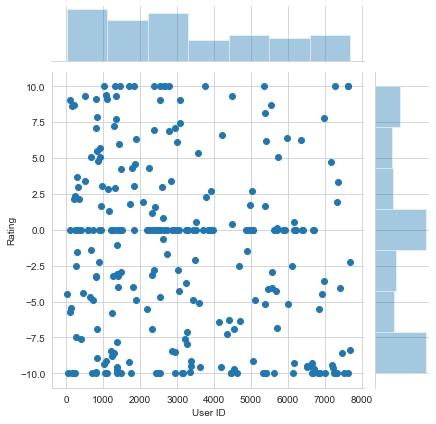

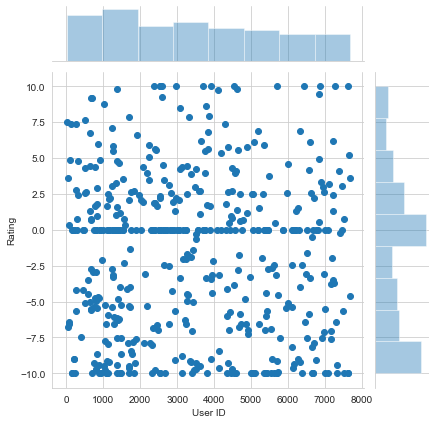

In [77]:
sns.jointplot(x = 'User ID', y = 'Rating', data = joke_6)
sns.jointplot(x = 'User ID', y = 'Rating', data = joke_7)

### Observing the distrubution of a particular jokes rating using distplot

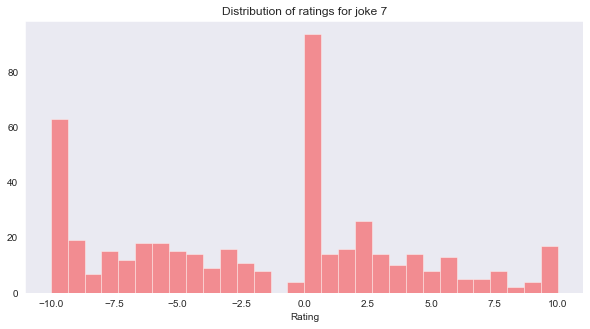

In [79]:
sns.set_style('dark')
plt.figure(figsize = (10,5))
plt.title('Distribution of ratings for joke 7')
sns.distplot(joke_7['Rating'],bins=30,kde=False,color='red')

### We now looked to analyze the newest jokes in the dataset through various visualizations with Seaborn. We subsetted the data to only include the new jokes and subsequently made a violon plot to show the distribution of ratings for those jokes in a different way

In [121]:
new_joke_list = ['151', '152', '153', '154', '155', '156']
new_jokes = long_df[long_df['Joke ID'].isin(['151', '152', '153', '154', '155', '156'])]
new_jokes = new_jokes.pivot(columns = 'Joke ID', values = 'Rating')

### As you can see in the output below, we were able to change the style of the graph to include a solid grey background instead of a white grid. Further, we were able to take axes off by using the despine() function, as well as set titles and more

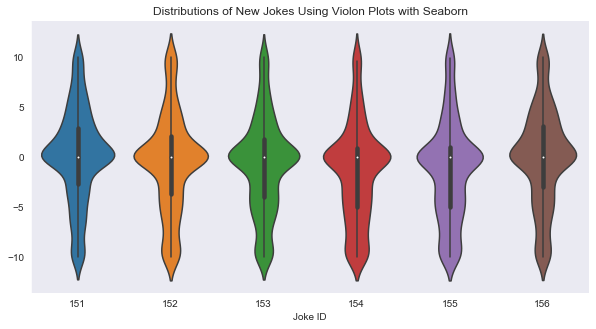

In [112]:
plt.figure(figsize = (10,5))
plt.title('Distributions of New Jokes Using Violon Plots with Seaborn')
sns.set_style('dark')
sns.violinplot(data = new_jokes)
sns.despine()

### Once again we changed the style to this time include a solid white background. We also changed the color layout of the graph by using the palette argument to the boxplot() function

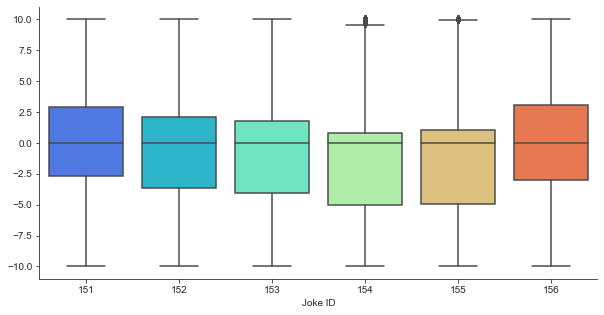

In [113]:
sns.set_style('ticks')
plt.figure(figsize = (10,5))
sns.boxplot(data = new_jokes, palette = 'rainbow')
sns.despine()

### We now looked to observe the correlations of ratings between newer jokes by using the heatmap() function with Seaborn

Text(0.5, 1, 'Correlation of Ratings Between New Jokes')

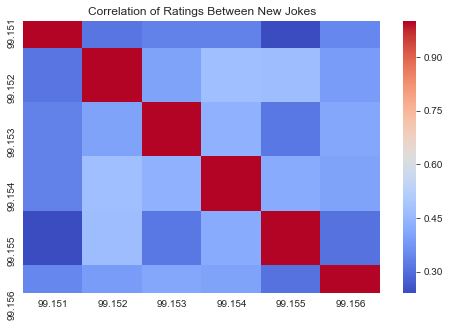

In [87]:
plt.figure(figsize = (8,5))
sns.heatmap(new_jokes.corr(), cmap = 'coolwarm')
plt.title('Correlation of Ratings Between New Jokes')

### Finally, a swarmplot was created in an attempt to view the distributions of the new jokes' ratings in a different way. The swarmplot is also useful in detecting outliers, as we can see below that jokes 154-156 all contain insensible outliers that could skew our analysis. Further, we were able to once again change our backgorund using the set_style function with Seaborn.

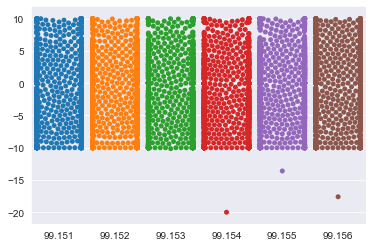

In [13]:
sns.set_style('darkgrid')
sns.swarmplot(data = new_jokes)

# Running a Collaborative Filtering Model to Recommend Jokes to Users

In [117]:
## Make data wide again
user_joke_matrix = long_df.pivot(index = 'User ID', columns = 'Joke ID', values = 'Rating')
user_joke_matrix

Joke ID,100,101,102,103,104,105,106,107,108,109,...,89,90,91,92,93,94,95,96,97,98
User ID,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,0.7500,0.2360,0.7925,0.7560,NaN,NaN,NaN,...,NaN,0.7235,0.5,NaN,0.5000,NaN,0.5000,0.7380,NaN,NaN
4,NaN,NaN,NaN,0.5000,0.5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.8090,0.3260,0.9055,0.7470,0.699,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.011,NaN,NaN,0.7430,0.4340,NaN,0.1045,0.639,0.6475,0.5,...,NaN,NaN,NaN,0.2105,NaN,NaN,0.5000,0.8080,0.0785,0.5
7,NaN,NaN,NaN,0.7735,0.8525,0.8285,0.6290,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6445,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,NaN,NaN,NaN,0.4410,0.3365,NaN,0.5435,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.238,0.3335,NaN,NaN,NaN
7693,NaN,NaN,NaN,NaN,0.3355,NaN,0.6400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7694,NaN,NaN,NaN,NaN,0.5000,0.5000,0.5000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
## replace NA with 0.5
user_joke_matrix.fillna(0.5, inplace = True)
user_joke_matrix

Joke ID,100,101,102,103,104,105,106,107,108,109,...,89,90,91,92,93,94,95,96,97,98
User ID,,,,,,,,,,,,,,,,,,,,,
3,0.500,0.5,0.5,0.7500,0.2360,0.7925,0.7560,0.500,0.5000,0.5,...,0.5,0.7235,0.5,0.5000,0.5000,0.500,0.5000,0.7380,0.5000,0.5
4,0.500,0.5,0.5,0.5000,0.5000,0.5000,0.5000,0.500,0.5000,0.5,...,0.5,0.5000,0.5,0.5000,0.5000,0.500,0.5000,0.5000,0.5000,0.5
5,0.500,0.5,0.5,0.8090,0.3260,0.9055,0.7470,0.699,0.5000,0.5,...,0.5,0.5000,0.5,0.5000,0.5000,0.500,0.5000,0.5000,0.5000,0.5
6,0.011,0.5,0.5,0.7430,0.4340,0.5000,0.1045,0.639,0.6475,0.5,...,0.5,0.5000,0.5,0.2105,0.5000,0.500,0.5000,0.8080,0.0785,0.5
7,0.500,0.5,0.5,0.7735,0.8525,0.8285,0.6290,0.500,0.5000,0.5,...,0.5,0.5000,0.5,0.5000,0.5000,0.500,0.5000,0.6445,0.5000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,0.500,0.5,0.5,0.4410,0.3365,0.5000,0.5435,0.500,0.5000,0.5,...,0.5,0.5000,0.5,0.5000,0.5000,0.238,0.3335,0.5000,0.5000,0.5
7693,0.500,0.5,0.5,0.5000,0.3355,0.5000,0.6400,0.500,0.5000,0.5,...,0.5,0.5000,0.5,0.5000,0.5000,0.500,0.5000,0.5000,0.5000,0.5
7694,0.500,0.5,0.5,0.5000,0.5000,0.5000,0.5000,0.500,0.5000,0.5,...,0.5,0.5000,0.5,0.5000,0.5000,0.500,0.5000,0.5000,0.5000,0.5


In [119]:
users = user_joke_matrix.index.tolist()
jokes = user_joke_matrix.columns.tolist()
user_joke_matrix = user_joke_matrix.to_numpy()
user_joke_matrix

array([[0.5   , 0.5   , 0.5   , ..., 0.738 , 0.5   , 0.5   ],
       [0.5   , 0.5   , 0.5   , ..., 0.5   , 0.5   , 0.5   ],
       [0.5   , 0.5   , 0.5   , ..., 0.5   , 0.5   , 0.5   ],
       ...,
       [0.5   , 0.5   , 0.5   , ..., 0.5   , 0.5   , 0.5   ],
       [0.5   , 0.5   , 0.5   , ..., 0.883 , 0.5   , 0.5   ],
       [0.5   , 0.5   , 0.5   , ..., 0.429 , 0.4825, 0.5   ]])

In [122]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [123]:
## Step 1: Set up neural network parameters: initialize the weights & bias randomly

num_input = long_df['Joke ID'].nunique()
num_hidden_1 = 10
num_hidden_2 = 5

X = tf.placeholder(tf.float64, [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1], dtype=tf.float64)),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2], dtype=tf.float64)),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1], dtype=tf.float64)),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input], dtype=tf.float64)),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2], dtype=tf.float64)),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'decoder_b2': tf.Variable(tf.random_normal([num_input], dtype=tf.float64)),
}

In [124]:
## Step 2: create active function

def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

In [125]:
## Step 3: construct the model and prediction

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
y_pred = decoder_op
y_true = X

In [126]:
## Step 4: Define the loss function & optimizer & evaluation metrics

loss = tf.losses.mean_squared_error(y_true, y_pred)
optimizer = tf.train.RMSPropOptimizer(0.03).minimize(loss)
eval_x = tf.placeholder(tf.int32, )
eval_y = tf.placeholder(tf.int32, )
pre, pre_op = tf.metrics.precision(labels=eval_x, predictions=eval_y)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [127]:
## Step 5: Initialize placeholders & variables bc Tensorflow

init = tf.global_variables_initializer()
local_init = tf.local_variables_initializer()
pred_data = pd.DataFrame()

In [128]:
## Step 6: Train the model

with tf.Session() as session:
    epochs = 100
    batch_size = 35

    session.run(init)
    session.run(local_init)

    num_batches = int(user_joke_matrix.shape[0] / batch_size)
    user_joke_matrix = np.array_split(user_joke_matrix, num_batches)
    
    for i in range(epochs):

        avg_cost = 0
        for batch in user_joke_matrix:
            _, l = session.run([optimizer, loss], feed_dict={X: batch})
            avg_cost += l

        avg_cost /= num_batches

        print("epoch: {} Loss: {}".format(i + 1, avg_cost))

    user_joke_matrix = np.concatenate(user_joke_matrix, axis=0)

    preds = session.run(decoder_op, feed_dict={X: user_joke_matrix})

    pred_data = pred_data.append(pd.DataFrame(preds))

    pred_data = pred_data.stack().reset_index(name = 'Rating')
    pred_data.columns = ['User ID', 'Joke ID', 'Rating']
    pred_data['User ID'] = pred_data['User ID'].map(lambda value: users[value])
    pred_data['Joke ID'] = pred_data['Joke ID'].map(lambda value: jokes[value])

epoch: 1 Loss: 0.10935631413655035
epoch: 2 Loss: 0.023124585698904663
epoch: 3 Loss: 0.010708195414265683
epoch: 4 Loss: 0.010660343871708831
epoch: 5 Loss: 0.010636376843241781
epoch: 6 Loss: 0.010614901528179902
epoch: 7 Loss: 0.010579192681751889
epoch: 8 Loss: 0.010521328859512919
epoch: 9 Loss: 0.010394390837032476
epoch: 10 Loss: 0.010267667492434126
epoch: 11 Loss: 0.010120859188991117
epoch: 12 Loss: 0.009990141630686563
epoch: 13 Loss: 0.009894564816053828
epoch: 14 Loss: 0.009823933512711063
epoch: 15 Loss: 0.009739375476532712
epoch: 16 Loss: 0.009660835903748098
epoch: 17 Loss: 0.00955740217890205
epoch: 18 Loss: 0.00949641684439547
epoch: 19 Loss: 0.009397391888216651
epoch: 20 Loss: 0.009347372616095275
epoch: 21 Loss: 0.009287654474409747
epoch: 22 Loss: 0.009231789864535475
epoch: 23 Loss: 0.009160912423073474
epoch: 24 Loss: 0.00912645926843558
epoch: 25 Loss: 0.009051885813121396
epoch: 26 Loss: 0.009002432247206312
epoch: 27 Loss: 0.008948227454876077
epoch: 28 Loss

### Taking a look a the prediction data

In [115]:
pred_data.head()

,Unnamed: 0,User ID,Joke ID,Rating
0,0,3,100,0.494387
1,1,3,101,0.498305
2,2,3,102,0.503023
3,3,3,103,0.577925
4,4,3,104,0.657741


In [145]:
## See the top jokes
avg_pred = pred_data.groupby(['Joke ID'], as_index=False).mean()
avg_pred
top = avg_pred.sort_values(by = ['Rating'], ascending = False)
top10Jokes = top.head(10)
top10Jokes

,Joke ID,User ID,Rating
4,104,3711.863214,0.567703
110,71,3711.863214,0.555188
90,52,3711.863214,0.535238
25,125,3711.863214,0.527701
125,88,3711.863214,0.526918
3,103,3711.863214,0.526312
89,49,3711.863214,0.524946
100,62,3711.863214,0.524517
72,31,3711.863214,0.524092
37,137,3711.863214,0.523234


In [147]:
ls = top10Jokes['Joke ID'].to_list()

In [149]:
joke = pd.read_excel('Dataset4JokeSet.xlsx', delimiter = ',', header = None)
joke

,0
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. ...
3,Q. What's the difference between a man and a t...
4,Q.\tWhat's O. J. Simpson's Internet address? ...
...,...
153,"Poodle: ""My life is a mess. My owner is mean, ..."
154,Did you hear that NASA has launched several co...
155,"A bear walks into a bar and says,""I'd like a b..."
156,A dog goes into a bar and orders a martini. Th...


In [150]:
## Viewing the content of the top 10 jokes

joke['Joke ID'] = joke.index
joke_content = joke.iloc[ls]
joke_content['Joke ID'] = joke_content.index
joke_content

,0,Joke ID
104,A couple of hunters are out in the woods in th...,104
71,"On the first day of college, the Dean addresse...",71
52,One Sunday morning William burst into the livi...,52
125,"A Briton, a Frenchman and a Russian are viewin...",125
88,A radio conversation of a US naval ship with ...,88
103,"As a pre-med student, I had to take a difficul...",103
49,A guy goes into confession and says to the pri...,49
62,"An engineer, a physicist and a mathematician a...",62
31,A man arrives at the gates of heaven. St. Pete...,31
137,WASHINGTON (Reuters) - A tragic fire on Monday...,137


In [134]:
# Extracting the highest rated joke for further visualizations

highest_joke = long_df[long_df['Joke ID'] == '104']

In [135]:
highest_joke.head()

,User ID,Joke ID,Rating
339802,3,104,0.2360
339803,4,104,0.5000
339804,5,104,0.3260
339805,6,104,0.4340
339806,7,104,0.8525


### Looking at the highest rated joke

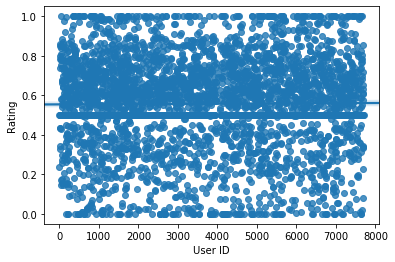

In [132]:
sns.regplot(x="User ID", y="Rating", data= highest_joke)

### The plot below represents the distribution of ratings for the joke that had the highest predicted ratings. We can see the distribution has much higher percentage of ratings above 0 than the average joke; and we have shown the plot using plt.show(), and saved it using the plt.savefig() argument.

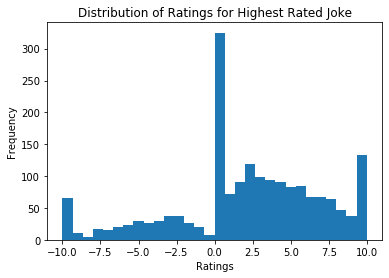

In [18]:
plt.hist(highest_joke['Rating'], 30)

plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Highest Rated Joke')


# save the figure
plt.savefig('plot.png', dpi=300, bbox_inches='tight')


plt.show()

# Visualizations with Bokeh

### Importing Libraries

In [20]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

### Creating a list of values for our plots

In [23]:
values = new_jokes.mean()
values

99.151   -0.536958
99.152   -0.801096
99.153   -1.474782
99.154   -1.350144
99.155   -0.053962
99.156    0.120044
dtype: float64

### By importing show and output_notebook we are able to output our plots to the notebook

In [46]:
jokes = ['New Joke 1', 'New Joke 2', 'New Joke 3', 'New Joke 4', 'New Joke 5']

p = figure(x_range=jokes, plot_height=250, title="Mean Ratings for New Jokes")

p.vbar(x=jokes, top=values, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = -2

show(p)

### We can now output our barplot to an HTML file using the output_file command with the extension .html 

In [44]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure

output_file("colormapped_bars.html")

jokes = ['New Joke 1', 'New Joke 2', 'New Joke 3', 'New Joke 4', 'New Joke 5']
values = values 

source = ColumnDataSource(data=dict(jokes = jokes, values = values, color=Spectral6))

p = figure(x_range=jokes, y_range=(-2,1), plot_height=250, title="Mean Ratings for New Jokes",
           toolbar_location=None, tools="")

p.vbar(x='jokes', top='values', width=0.9, color='color', legend = 'jokes', source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

### Creating Scatter Plots with Various Scatter Markers and Line Glyph Plots

In [26]:
p = figure(plot_width=400, plot_height=400)

# add a square renderer with a size, color, and alpha
p.asterisk(highest_joke['User ID'], highest_joke['Rating'], size=20, color="blue", alpha=0.5)

# show the results
show(p)

In [ ]:
### Inserting a single line line glyph plot. We can do better than this, though.

In [30]:
p = figure(plot_width=400, plot_height=400)

p.line(highest_joke['User ID'], highest_joke['Rating'], line_width=2)

show(p)

In [56]:
new_joke = long_df[long_df['Joke ID'] == '111']
new_joke.head()

,User ID,Joke ID,Rating
368460,3,111,NaN
368461,4,111,NaN
368462,5,111,NaN
368463,6,111,5.1
368464,7,111,NaN


In [60]:
p = figure(plot_width=400, plot_height=400)

p.line(new_joke['User ID'], new_joke['Rating'], line_width=2)

show(p)

### Looking to observe the scatter plot of a joke in different ways, with different grid layouts

In [66]:
from bokeh.layouts import gridplot


s1 = figure(plot_width=300, plot_height=300, title=None)
s1.circle(new_joke['User ID'], new_joke['Rating'], size=10, color="navy", alpha=0.5)


s2 = figure(plot_width=300, plot_height=300, x_range=s1.x_range, y_range=s1.y_range, title=None)
s2.triangle(new_joke['User ID'], new_joke['Rating'], size=10, color="firebrick", alpha=0.5)


s3 = figure(plot_width=300, plot_height=300, x_range=s1.x_range, title=None)
s3.square(new_joke['User ID'], new_joke['Rating'], size=10, color="olive", alpha=0.5)

p = gridplot([[s1, s2, s3]], toolbar_location=None)

show(p)

### We can see there are many different ways to layout multiple graphs within your notebook

In [79]:
grid = gridplot([[s1, s2], [s3, None]], plot_width=250, plot_height=250)

show(grid)

### An easy way to embed an HTML file with bokeh is to use the file_html() function as shown below.  Doing this allows us to create an html page directly from the function while still using the plotting mechanisms we want in Bokeh

In [106]:
from bokeh.resources import CDN
from bokeh.embed import file_html

plot = figure(plot_width=300, plot_height=300, title=None)
plot.circle_cross(new_joke['User ID'], new_joke['Rating'], size=10, color="navy", alpha=0.5)

html = file_html(plot, CDN, "my plot")

# Conclusion and Results